In [49]:
from time import strftime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import datetime 
import re
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from math import factorial
from scipy.signal import savgol_filter
from tabnanny import verbose
import numpy as np
import pandas as pd
import glob
import datetime 
from scipy import stats
from sklearn.linear_model import Lasso
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

Defining Parameters

In [50]:
return_scale = 1
#Autocorrelation lags
lags = 20
lags_min = lags - lags
start_date = "2020-12-10"

## VIX Data

In [51]:
d1_name ="Data/VIX_History*"
d1_filename = glob.glob(d1_name)[0]
d1= pd.read_csv(d1_filename)
d1['DATE'] = pd.to_datetime(d1["DATE"])
d1 = d1.set_index("DATE")
d1= d1.loc[start_date:]
d1 = d1.resample("1W").sum()
d1["RETURNS"] = d1["CLOSE"] - d1["CLOSE"].shift(return_scale)
d1=d1.dropna()

In [52]:
d1_ret = d1[["RETURNS"]]

d1 = d1[["CLOSE"]]


## Google News Data Processing

### News


Downloading Data

In [53]:
partial_name = f'Data/google*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])



Calculating Returns

In [54]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_news=df_weekly



Plots

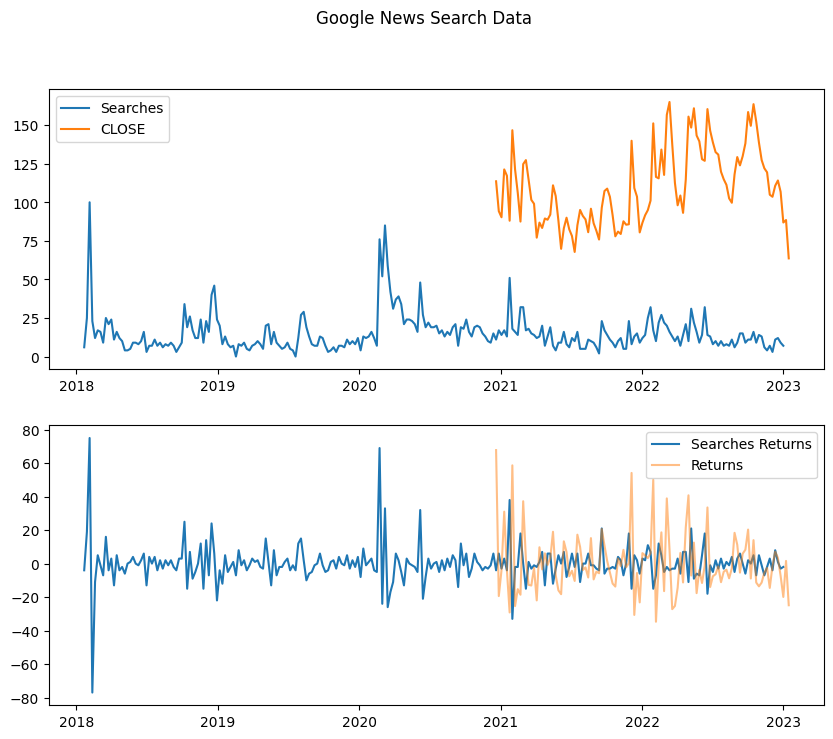

In [55]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google News Search Data")
for i in df_news.columns:
    if "Returns" in i:
        axs[1].plot(df_news.index,df_news[i], label = i)
    else:
        axs[0].plot(df_news.index,df_news[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()


In [56]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = d1.merge(weekly_users, on="DATE")
df_returns= d1_ret.merge(weekly_returns, on="DATE")


### Bonds

In [57]:
partial_name = f'Data/google_bonds*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Bonds"]


In [58]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_bonds = df_weekly


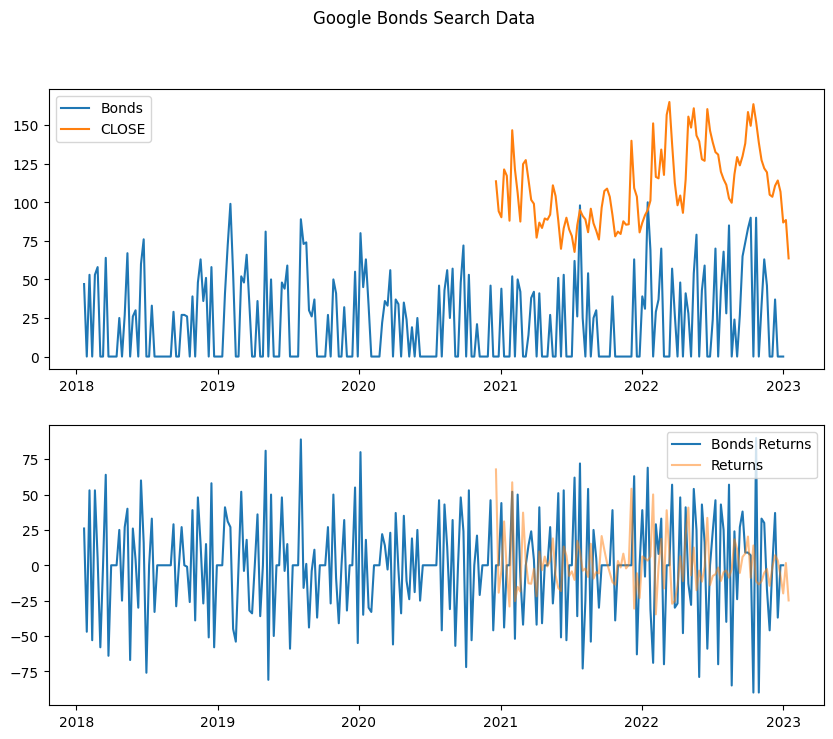

In [59]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google Bonds Search Data")
for i in df_bonds.columns:
    if "Returns" in i:
        axs[1].plot(df_bonds.index,df_bonds[i], label = i, alpha= 1)
    else:
        axs[0].plot(df_bonds.index,df_bonds[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()

In [60]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")


### Exchange Rate

In [61]:
partial_name = f'Data/google_exchange*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Exchange Rate"]

In [62]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()
df_weekly.index.names = ["DATE"]

df_exchange  = df_weekly


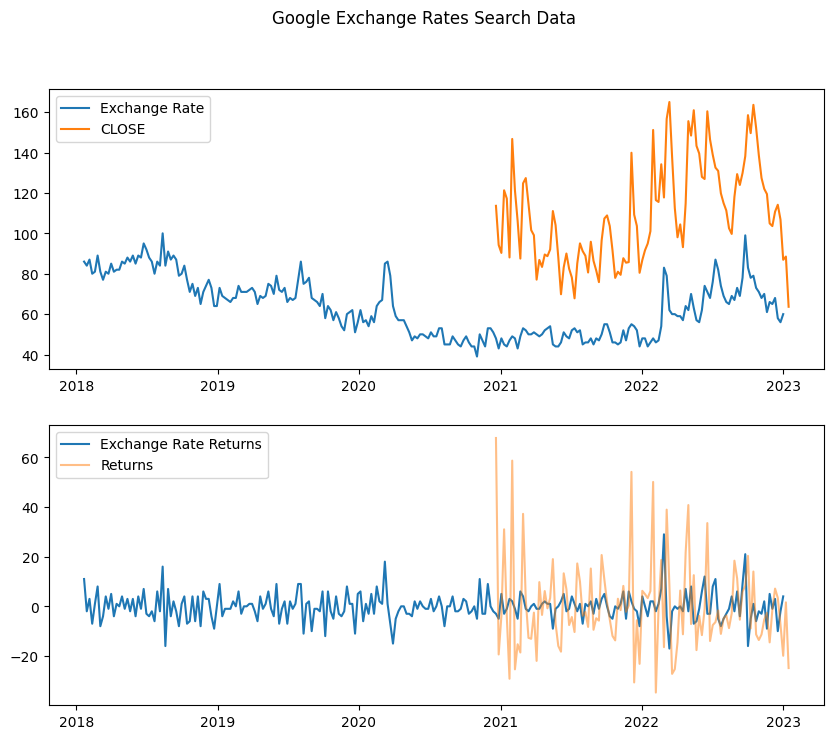

In [63]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google Exchange Rates Search Data")
for i in df_exchange.columns:
    if "Returns" in i:
        axs[1].plot(df_exchange.index,df_exchange[i], label = i, alpha= 1)
    else:
        axs[0].plot(df_exchange.index,df_exchange[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()

In [64]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

### Interest Rate

In [65]:
partial_name = f'Data/google_interest*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Interest Rate"]

In [66]:
df_weekly

,Interest Rate
Week,
2018-01-14,16
2018-01-21,27
2018-01-28,0
2018-02-04,20
2018-02-11,0
...,...
2022-12-04,75
2022-12-11,24
2022-12-18,0


In [67]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()
df_weekly.index.names = ["DATE"]
df_interest=df_weekly


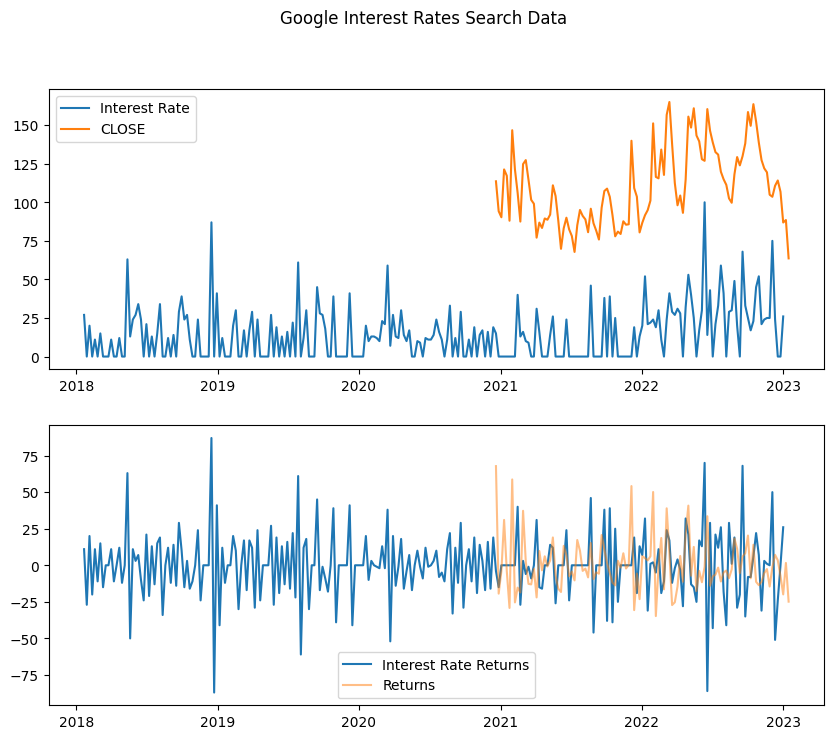

In [68]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google Interest Rates Search Data")
for i in df_interest.columns:
    if "Returns" in i:
        axs[1].plot(df_interest.index,df_interest[i], label = i, alpha= 1)
    else:
        axs[0].plot(df_interest.index,df_interest[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()

In [69]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

### Stock Market News

In [70]:
partial_name = f'Data/google_stock_market_news*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Stock Market News"]


In [71]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()
df_weekly.index.names = ["DATE"]

df_stock_market_news  = df_weekly


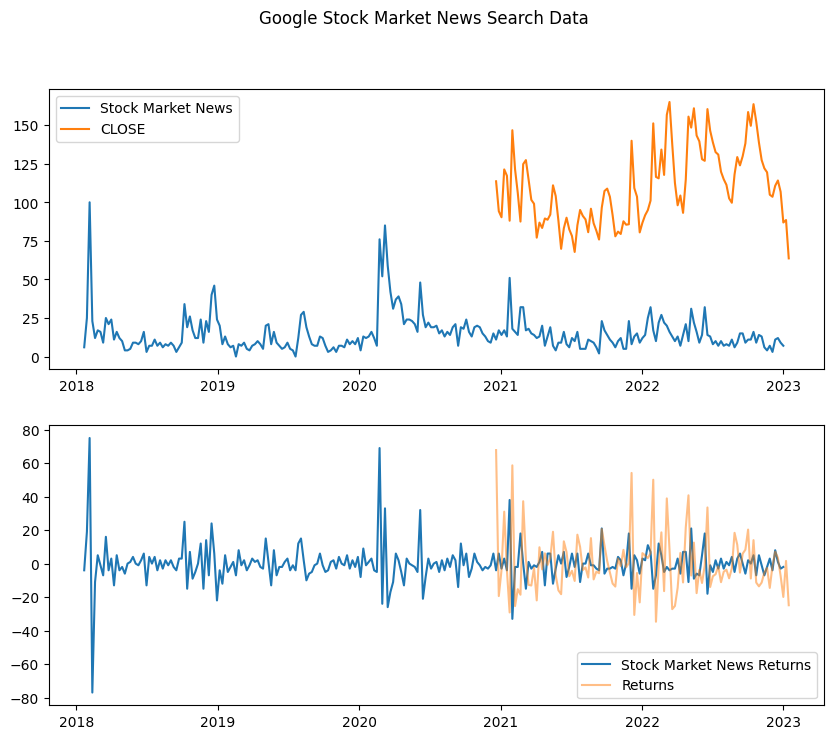

In [72]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google Stock Market News Search Data")
for i in df_stock_market_news.columns:
    if "Returns" in i:
        axs[1].plot(df_stock_market_news.index,df_stock_market_news[i], label = i, alpha= 1)
    else:
        axs[0].plot(df_stock_market_news.index,df_stock_market_news[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()

In [73]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

### Stock Market

In [74]:
partial_name = f'Data/google_stock_market.csv'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Stock Market"]

In [75]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_stock_market  = df_weekly



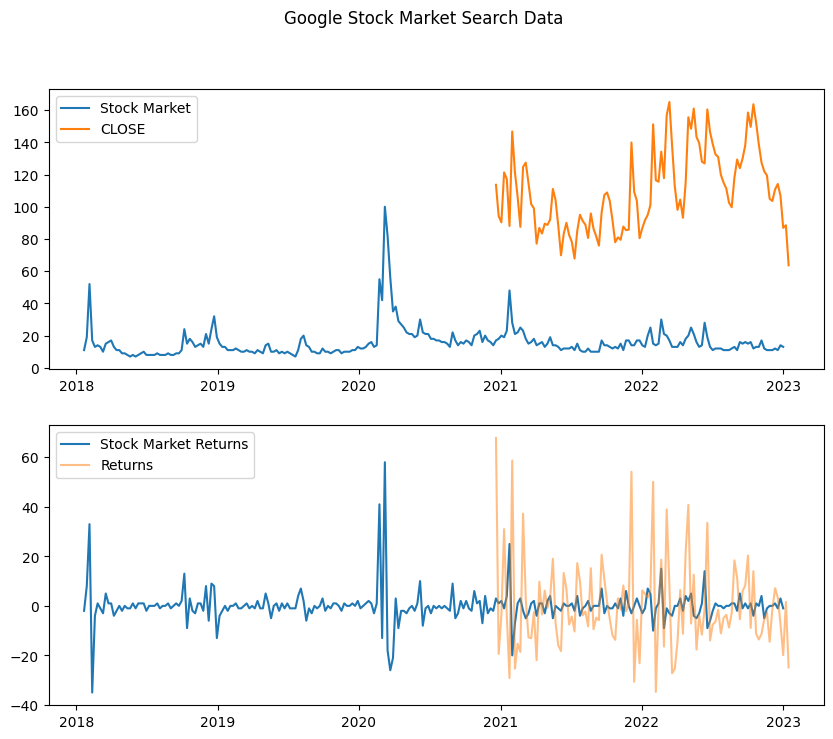

In [76]:
fig, axs = plt.subplots(2, figsize= (10, 8))

fig.suptitle("Google Stock Market Search Data")
for i in df_stock_market.columns:
    if "Returns" in i:
        axs[1].plot(df_stock_market.index,df_stock_market[i], label = i, alpha= 1)
    else:
        axs[0].plot(df_stock_market.index,df_stock_market[i], label = i)

axs[0].plot(d1.index,d1["CLOSE"], label = "CLOSE")
axs[1].plot(d1_ret.index,d1_ret["RETURNS"], label = "Returns", alpha= 0.5)

axs[1].legend()
axs[0].legend()

plt.show()

In [77]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

# Statistical Tests

In [78]:
df_list = [df_total, df_returns]

In [86]:
df_total.head(107)

,CLOSE,Searches,Bonds,Exchange Rate,Interest Rate,Stock Market News,Stock Market
DATE,,,,,,,
2020-12-20,113.61,11,0,48,15,11,17
2020-12-27,94.23,17,0,43,0,17,18
2021-01-03,90.30,14,44,48,0,14,20
2021-01-10,121.31,17,0,45,0,17,19
2021-01-17,117.21,13,0,44,0,13,23
...,...,...,...,...,...,...,...
2022-12-04,103.58,3,0,65,75,3,11
2022-12-11,110.72,11,37,68,24,11,12
2022-12-18,114.14,12,0,58,0,12,11


## Correlation Methods

#### Pearson Correlation

In [80]:
for i in df_list:
    cols = i.columns.to_list()
    corr_df = i.reset_index(drop=True).to_numpy()
    corr_coef = np.corrcoef(corr_df, rowvar = False)
    #print(corr_coef)
    for i in range(len(cols)):
        for j in range(i +1, len(cols)):
            print("{} vs {} Correlation: {}".format(cols[i], cols[j], corr_coef[i][j]))
    print("--------------")

CLOSE vs Searches Correlation: 0.14601883249699896
CLOSE vs Bonds Correlation: 0.1741341138865333
CLOSE vs Exchange Rate Correlation: 0.6340745566689059
CLOSE vs Interest Rate Correlation: 0.3794632923048897
CLOSE vs Stock Market News Correlation: 0.14601883249699896
CLOSE vs Stock Market Correlation: 0.1853599279779403
Searches vs Bonds Correlation: 0.04463939682461798
Searches vs Exchange Rate Correlation: -0.0452426690008508
Searches vs Interest Rate Correlation: 0.044437680115626384
Searches vs Stock Market News Correlation: 1.0
Searches vs Stock Market Correlation: 0.8358334035944828
Bonds vs Exchange Rate Correlation: 0.23969502747730162
Bonds vs Interest Rate Correlation: 0.1806713970872423
Bonds vs Stock Market News Correlation: 0.04463939682461798
Bonds vs Stock Market Correlation: 0.05206982049433379
Exchange Rate vs Interest Rate Correlation: 0.45553796990267664
Exchange Rate vs Stock Market News Correlation: -0.0452426690008508
Exchange Rate vs Stock Market Correlation: -0.

#### Spearman Correlation

In [81]:
for i in df_list:
    cols = i.columns.to_list()
    corr_df = i.reset_index(drop=True).to_numpy()
    corr_coef = stats.spearmanr(corr_df)[0]
    for i in range(len(cols)):
        for j in range(i +1, len(cols)):
            print("{} vs {} Correlation: {}".format(cols[i], cols[j], corr_coef[i][j]))
    #print("{} vs {} Correlation: {}".format(cols[0], cols[1], corr_coef))
    print("--------------")

CLOSE vs Searches Correlation: 0.22735987600976887
CLOSE vs Bonds Correlation: 0.1759112584326213
CLOSE vs Exchange Rate Correlation: 0.6313836224493371
CLOSE vs Interest Rate Correlation: 0.4305310249892423
CLOSE vs Stock Market News Correlation: 0.22735987600976887
CLOSE vs Stock Market Correlation: 0.2711977547109455
Searches vs Bonds Correlation: 0.05337471219123073
Searches vs Exchange Rate Correlation: 0.015331915266452355
Searches vs Interest Rate Correlation: 0.002395059050061148
Searches vs Stock Market News Correlation: 0.9999999999999999
Searches vs Stock Market Correlation: 0.7405290150687988
Bonds vs Exchange Rate Correlation: 0.17907761990632462
Bonds vs Interest Rate Correlation: 0.18248230340381857
Bonds vs Stock Market News Correlation: 0.05337471219123073
Bonds vs Stock Market Correlation: 0.04842933618372212
Exchange Rate vs Interest Rate Correlation: 0.4574740083873739
Exchange Rate vs Stock Market News Correlation: 0.015331915266452353
Exchange Rate vs Stock Market

#### Cross Correlation

In [82]:
for i in df_list:
    cols = i.columns.to_list()
    
    for j in range(1,len(cols)):
        cross_corr = sm.tsa.stattools.ccf(i[cols[0]],i[cols[j]] )
        sorted_corr = sorted(np.abs(cross_corr), reverse = True) [0:5]
        print("{} vs. {}".format(cols[0], cols[j]))
        for k in sorted_corr:
            if k in cross_corr:
                print("Lag {}: {}".format(cross_corr.tolist().index(k), k))
            else:
                print("Lag {}: -{}".format(cross_corr.tolist().index(-k), k))
        print("")
        #print("{} vs {} Correlation: {}".format(cols[i], cols[j], corr_coef[i][j]))
    
    print("--------------")

CLOSE vs. Searches
Lag 88: 0.9617557060503026
Lag 90: 0.9231385019361633
Lag 87: 0.8301411011196643
Lag 101: -0.8075262004693962
Lag 86: 0.7600984585559845

CLOSE vs. Bonds
Lag 106: 0.8198096377623747
Lag 105: 0.47277274669218566
Lag 92: -0.3937221532588615
Lag 93: -0.3846488191158559
Lag 75: -0.3470139366044091

CLOSE vs. Exchange Rate
Lag 106: 0.7457907170722425
Lag 1: 0.6940756910405277
Lag 92: -0.6778090854578948
Lag 91: -0.6531597593345637
Lag 71: -0.6425056588231853

CLOSE vs. Interest Rate
Lag 91: -0.6035671880233201
Lag 90: -0.5258017427288004
Lag 71: -0.5106383216553264
Lag 92: -0.506062242274706
Lag 93: -0.5002349825976555

CLOSE vs. Stock Market News
Lag 88: 0.9617557060503026
Lag 90: 0.9231385019361633
Lag 87: 0.8301411011196643
Lag 101: -0.8075262004693962
Lag 86: 0.7600984585559845

CLOSE vs. Stock Market
Lag 90: 1.544494222828657
Lag 88: 1.4233488460481298
Lag 89: 1.3930500448228453
Lag 91: 1.3599748206328823
Lag 87: 1.176241025342111

--------------
RETURNS vs. Searches

## Time Lagged LASSO Regression

In [83]:
for data in df_list:
    for j in data.columns:
        if j!= data.columns[0]:
            print("{} vs. {}".format(data.columns[0], j))
            lag_data = data[[data.columns[0], j]]
            for i in range(lags_min, lags):
                lag_name = "lag {}".format(i)
                lag_data[lag_name] = lag_data[j].shift(i)

            lag_data = lag_data.dropna()

            Y = lag_data[data.columns[0]]
            X = lag_data.iloc[:,1:]

            X_norm = X.copy()
            for i in X.columns:    
                X_norm[i] =(X[i] - X[i].mean()) / X[i].std() 

            Y_norm = (Y - Y.mean()) / Y.std() 


            alphas = np.geomspace(1e-3,1e-1, 20)
            for i in alphas:
                lassoreg = Lasso(alpha=i)
                lassoreg.fit(X_norm,Y_norm)
                coefs= lassoreg.coef_
                if sum(coefs) != 0:
                    alpha = i

            print("alpha: {}".format(alpha))
            lassoreg = Lasso(alpha=alpha)
            lassoreg.fit(X_norm,Y_norm)
            coefs= lassoreg.coef_


            lasso_df = X_norm.copy()
            drop_list = []
            for i in range(len(coefs)):
                if coefs[i] == 0:
                    drop_list.append(X_norm.columns[i])


            lasso_df = lasso_df.drop(columns = drop_list)

            lasso2 = sm.add_constant(lasso_df)
            sparse_reg = sm.OLS(Y, lasso2)
            sparse = sparse_reg.fit()
            print(sparse.summary())
            print("{} Statistically Significant Lags".format(sum(sparse.pvalues < 0.05)))

            print("-----------")


CLOSE vs. Searches
alpha: 0.1
                            OLS Regression Results                            
Dep. Variable:                  CLOSE   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     15.34
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           4.84e-08
Time:                        14:51:01   Log-Likelihood:                -390.15
No. Observations:                  88   AIC:                             788.3
Df Residuals:                      84   BIC:                             798.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.6372 

## Granger Causality F-Tests

In [84]:
for data in df_list:
    x_col = data.columns[0]

    adf1 = sm.tsa.stattools.adfuller(data[x_col], autolag='AIC')[1]
    if adf1 >= 0.05:
        print("All {} Timeseries are not Stationary".format(x_col))
    else:
        for j in data.columns:
            if j!= x_col:
                adf2 = sm.tsa.stattools.adfuller(data[j], autolag='AIC')[1]

                if adf2 < 0.05:
                    granger = sm.tsa.stattools.grangercausalitytests(data[[x_col,j]], lags, verbose= False)
                    print( "{} vs. {}".format(x_col, j))

                    ftests=[]
                    pvals = []
                    for i in range(lags):
                        ftests.append(granger[i+1][0]['ssr_ftest'][0])
                        pvals.append(granger[i+1][0]['ssr_ftest'][1])

                    sort_ftest = sorted(ftests,reverse = True) [0:5]

                    for i in sort_ftest:
                        ind = ftests.index(i)
                        print("Lag {}: {}".format(ind +1, pvals[ind]))
                    print("")
                else:
                    print("{} Timeseries are not Stationary".format(j))

                
    print("----------")

CLOSE vs. Searches
Lag 1: 5.823261492680962e-10
Lag 2: 1.590485416285971e-10
Lag 3: 2.4213396913675056e-10
Lag 4: 4.0059125008692564e-11
Lag 5: 2.4611187633753716e-10

CLOSE vs. Bonds
Lag 2: 0.12372454306073762
Lag 1: 0.1512177483685099
Lag 4: 0.1619899459870064
Lag 7: 0.14221067203127472
Lag 5: 0.25253114584074654

Exchange Rate Timeseries are not Stationary
Interest Rate Timeseries are not Stationary
CLOSE vs. Stock Market News
Lag 1: 5.823261492680962e-10
Lag 2: 1.590485416285971e-10
Lag 3: 2.4213396913675056e-10
Lag 4: 4.0059125008692564e-11
Lag 5: 2.4611187633753716e-10

Stock Market Timeseries are not Stationary
----------
RETURNS vs. Searches Returns
Lag 1: 5.744190329794417e-10
Lag 2: 8.557909717946984e-11
Lag 3: 4.927146619505836e-12
Lag 4: 1.2851583914482526e-11
Lag 5: 8.624076830266069e-11

RETURNS vs. Bonds Returns
Lag 8: 0.33458025070820313
Lag 9: 0.36689356104220144
Lag 10: 0.41674736469010676
Lag 5: 0.4475712529758731
Lag 7: 0.4757445457148829

RETURNS vs. Exchange Rate 

## Dynamic Time Wrapping

In [85]:
for data in df_list:
    x_col = data.columns[0]

    dtw1 = (data[x_col] - data[x_col].mean())/data[x_col].std() 
    for j in data.columns:
        #print(j)
        if j!= x_col:
            dtw2 = (data[j] - data[j].mean())/data[j].std() 
            print( "{} vs. {}".format(x_col, j))

            distance, path = fastdtw( dtw1,dtw2, dist=euclidean)
            print("Distance: {}".format(distance))
            print("Average Distance: {}".format(distance/len(dtw2)))
            print("")
    print("----------")

CLOSE vs. Searches
Distance: 56.52651703704086
Average Distance: 0.5282852059536529

CLOSE vs. Bonds
Distance: 79.78277273948702
Average Distance: 0.7456333900886637

CLOSE vs. Exchange Rate
Distance: 45.18430627965074
Average Distance: 0.4222832362584181

CLOSE vs. Interest Rate
Distance: 59.987404471133964
Average Distance: 0.5606299483283548

CLOSE vs. Stock Market News
Distance: 56.52651703704086
Average Distance: 0.5282852059536529

CLOSE vs. Stock Market
Distance: 55.862776393214595
Average Distance: 0.5220820223664916

----------
RETURNS vs. Searches Returns
Distance: 67.35527241673088
Average Distance: 0.6294885272591672

RETURNS vs. Bonds Returns
Distance: 98.68362178175065
Average Distance: 0.9222768390817817

RETURNS vs. Exchange Rate Returns
Distance: 77.77879981805515
Average Distance: 0.726904671196777

RETURNS vs. Interest Rate Returns
Distance: 85.77870680825549
Average Distance: 0.8016701570864999

RETURNS vs. Stock Market News Returns
Distance: 67.35527241673088
Avera